In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [32]:
import pandas as pd

df = pd.read_csv("D:\product_purchase_prediction\data\product_purchase_ - product_purchase_impure.csv.csv")

df_clean = df.dropna(subset=["Purchase"])

# Fill missing values in numerical columns with median
for col in ["TimeOnSite", "Age", "AdsClicked", "PreviousPurchases"]:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

df_clean["Gender"] = df_clean["Gender"].map({"Male": 1, "Female": 0})

C:\Users\omves\AppData\Local\Temp\ipykernel_185280\27570138.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\omves\AppData\Local\Temp\ipykernel_185280\27570138.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\

C:\Users\omves\AppData\Local\Temp\ipykernel_185280\2261556441.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchase', y=feature, data=df_clean, ax=ax, palette="Set2")
C:\Users\omves\AppData\Local\Temp\ipykernel_185280\2261556441.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchase', y=feature, data=df_clean, ax=ax, palette="Set2")
C:\Users\omves\AppData\Local\Temp\ipykernel_185280\2261556441.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchase', y=feature, data=df_clean, ax=ax, palette="Set2")
C:\Users\omve

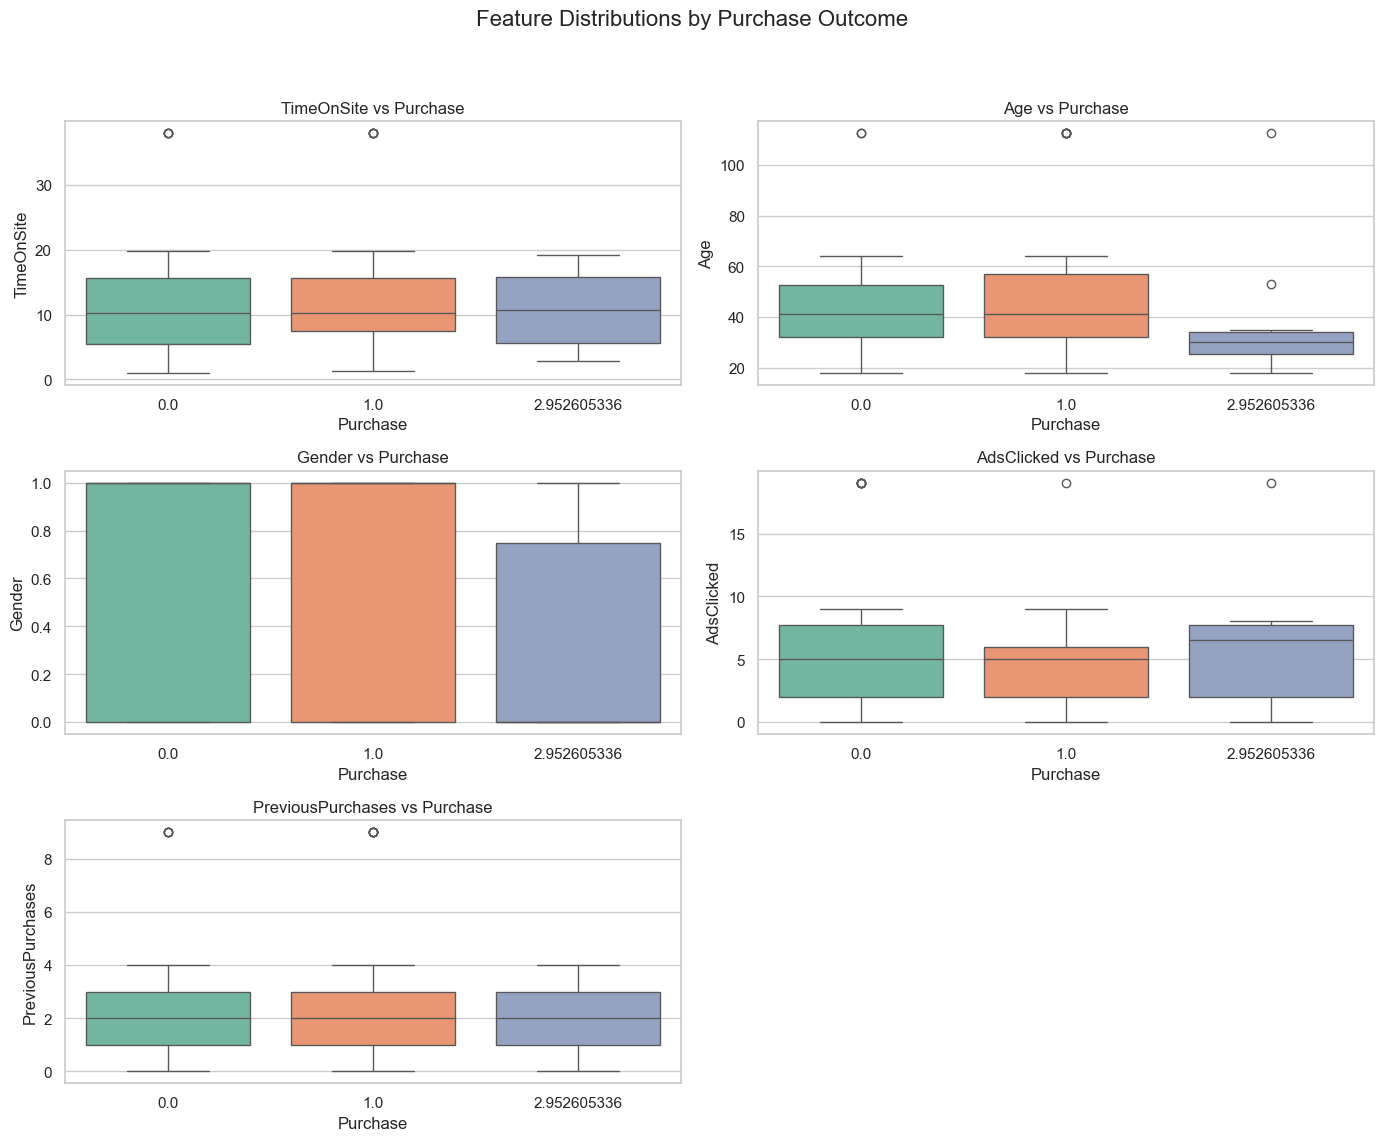

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Feature Distributions by Purchase Outcome", fontsize=16)

features = ['TimeOnSite', 'Age', 'Gender', 'AdsClicked', 'PreviousPurchases']
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(x='Purchase', y=feature, data=df_clean, ax=ax, palette="Set2")
    ax.set_title(f'{feature} vs Purchase')

axes[2][1].axis('off')  # Hide unused subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [34]:
# Encode gender
#df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # M=1, F=0

X = df_clean.drop("Purchase", axis=1)
y = df_clean["Purchase"].astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Logistic Regression
log_model = LogisticRegression(max_iter=25)
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

C:\Users\omves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 25 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=25).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
models = {'Logistic Regression': log_model, 'Decision Tree': tree_model}

for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.4594594594594595
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.88      0.58        16
           1       0.60      0.16      0.25        19
           2       0.00      0.00      0.00         2

    accuracy                           0.46        37
   macro avg       0.35      0.34      0.28        37
weighted avg       0.50      0.46      0.38        37

Confusion Matrix:
 [[14  2  0]
 [16  3  0]
 [ 2  0  0]]

Model: Decision Tree
Accuracy: 0.3783783783783784
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.38      0.35        16
           1       0.41      0.37      0.39        19
           2       0.50      0.50      0.50         2

    accuracy                           0.38        37
   macro avg       0.42      0.41      0.41        37
weighted avg       0.38      0.38      0.38        37

Confusion Matrix:
 [[ 6 10

C:\Users\omves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\omves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\omves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [42]:
with open("D:\product_purchase_prediction\model\logistic_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

with open("D:\product_purchase_prediction\model\decision_tree_model.pkl", "wb") as f:
    pickle.dump(tree_model, f)